In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [18]:
(ds_train, ds_val), ds_info = tfds.load(
    'cassava',
    split=['train', 'validation'],
    as_supervised=True,
    with_info=True
)

In [19]:

def preprocess(image, label):
    image = tf.image.resize(image, [150, 150])  
    image = tf.cast(image, tf.float32) / 255.0  
    return image, label

batch_size = 64

ds_train = ds_train.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(ds_train, validation_data=ds_val, epochs=5, batch_size=64, validation_split=0.1)



Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.4388 - loss: 2.3490 - val_accuracy: 0.5368 - val_loss: 1.2275
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5435 - loss: 1.2046 - val_accuracy: 0.5934 - val_loss: 1.1087
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.6090 - loss: 1.0467 - val_accuracy: 0.6083 - val_loss: 1.0829
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.6729 - loss: 0.8696 - val_accuracy: 0.5982 - val_loss: 1.2198
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.7736 - loss: 0.6419 - val_accuracy: 0.5617 - val_loss: 1.3100


In [23]:
train_loss, train_acc = model.evaluate(ds_train)
print(f"Train Accuracy: {train_acc:.2f}")

89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.8640 - loss: 0.4231
Train Accuracy: 0.88


In [24]:
test_loss, test_acc = model.evaluate(ds_val)
print(f"Test Accuracy: {test_acc:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.5492 - loss: 1.3387
Test Accuracy: 0.56


In [25]:
for images, labels in ds_val.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = labels.numpy()
    break  
print("Predicted:", predicted_classes[1])
print("Actual:", actual_classes[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step 
Predicted: 3
Actual: 2


In [26]:
class_names = ds_info.features['label'].names
print(class_names)

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


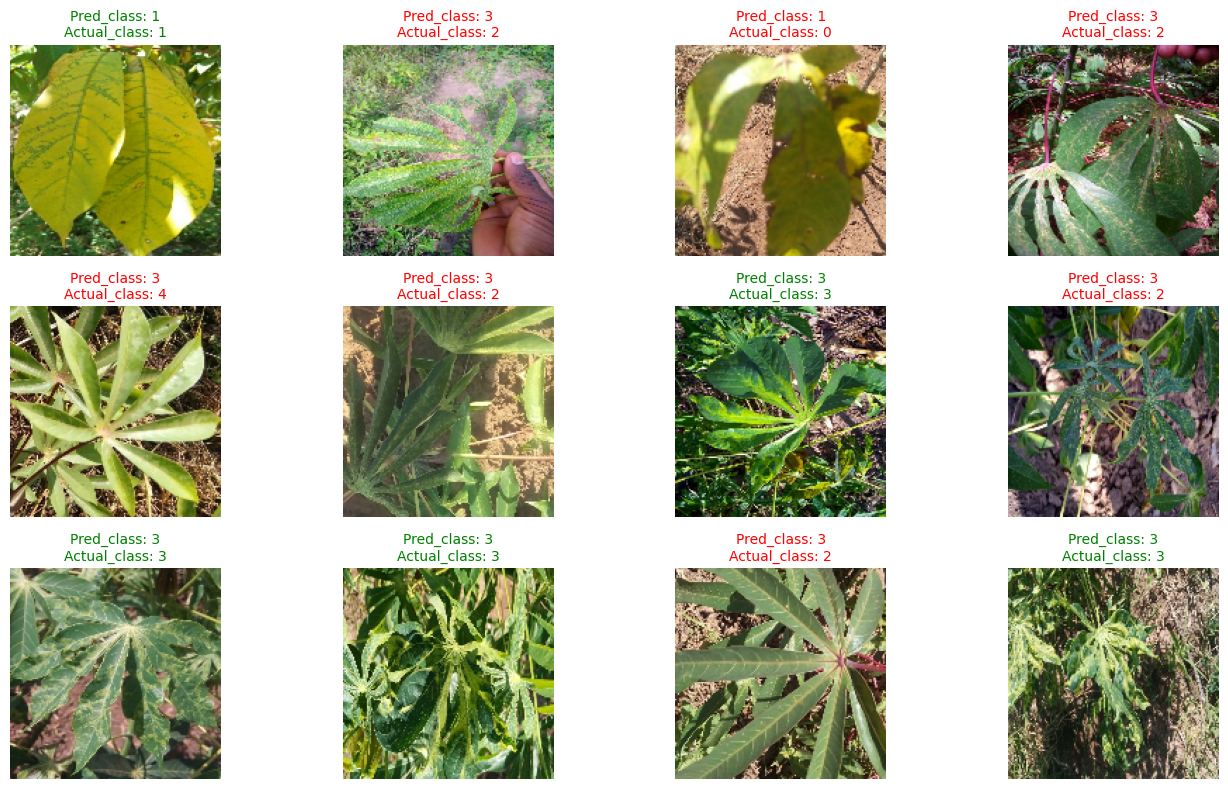

In [27]:
plt.figure(figsize=(14, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])

    pred_index = predicted_classes[i]
    true_index = actual_classes[i]

    color = 'green' if pred_index == true_index else 'red'
    plt.title(f"Pred_class: {pred_index}\nActual_class: {true_index}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

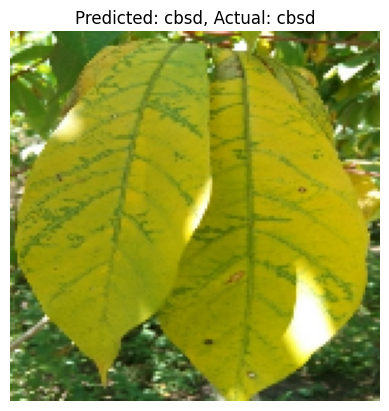

In [28]:
predicted_label = class_names[predicted_classes[0]]
actual_label = class_names[actual_classes[0]]
plt.imshow(images[0])
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()